In [68]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [69]:
# Loading Dataset
df=pd.read_csv('/content/Airbnb_Open_Data.csv', low_memory=False)

In [70]:
# Displaying First Few Rows
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [71]:
# Checking Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [72]:
# Counting Duplicate Records
df.duplicated().value_counts()

,count
False,102058
True,541


In [73]:
# Droping Duplicate Records
df.drop_duplicates(inplace=True)

In [74]:
# Droping House Rules and License Columns with Insufficient Data
df.drop(['house_rules','license'], axis=1, inplace=True)

In [75]:
# Removing all Dollar ($) Signs from the Price and Service Fee Columns
df['price']=df['price'].str.replace('$','', regex=False)
df['service fee']=df['service fee'].str.replace('$','', regex=False)

In [76]:
# Removing all Commas (,) from the Price and Service Fee Columns
df['price']=df['price'].str.replace(',','', regex=False)
df['service fee']=df['service fee'].str.replace(',','', regex=False)

In [77]:
# Renaming the Price and Service Fee Columns to Include a Dollar ($) Sign
df.rename(columns={'price':'price ($)', 'service fee':'service fee ($)'}, inplace=True)

In [78]:
# Dropping all Records with Missing Values
df.dropna(inplace=True)

In [79]:
# Changing Mismatched Data Types to Appropriate once
df['price ($)']=df['price ($)'].astype(float)
df['service fee ($)']=df['service fee ($)'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)

In [80]:
# Correcting the Spelling of "Brookln" to "Brooklyn"
df.loc[df['neighbourhood group']=='brookln', 'neighbourhood group']='Brooklyn'

In [81]:
# Getting rid of Outliers in the "Availability 365" Column Data
df=df.drop(df[df['availability 365']>500].index)

In [82]:
# Counting Duplicate Records
df.duplicated().value_counts()

,count
False,83411


In [83]:
# Checking Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

In [84]:
# Describing Data
df.describe()

,lat,long,Construction year,price ($),service fee ($),minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,2012.488509,626.212730,125.243709,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,5.760870,331.787179,66.360979,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


In [85]:
# Different Property Types in the Dataset
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


Text(0.5, 1.0, 'Property Types and their count in the Dataset')

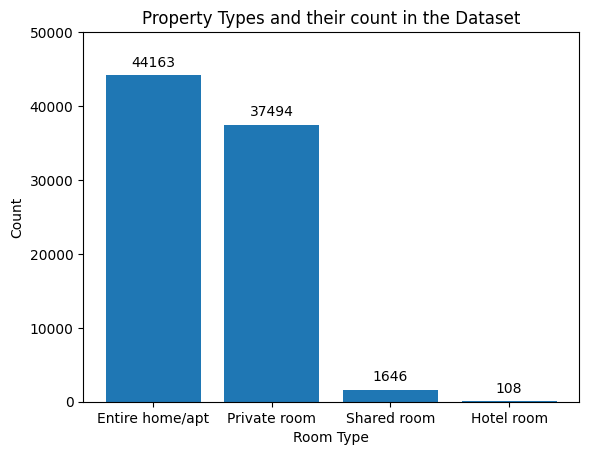

In [86]:
# Room Type Count Plotted on a Bar Chart
room_type_bar=plt.bar(property_types.index, property_types.loc[:,"count"])
plt.bar_label(room_type_bar, labels=property_types.loc[:,"count"], padding=4)
plt.ylim([0,50000])
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Property Types and their count in the Dataset')

In [87]:
# Neighbourhood Groups having the Highest Number of Listings
neighbourhood_groups=df['neighbourhood group'].value_counts().to_frame()
neighbourhood_groups

,count
neighbourhood group,
Brooklyn,34636
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816


Text(0.5, 1.0, 'Neighbourhood Groups and their count in the Dataset')

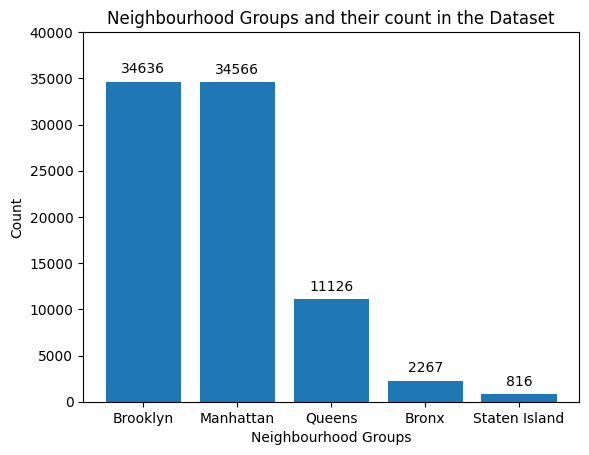

In [88]:
# Neighbourhood Groups having the Highest Number of Listings Plotted on a Bar Chart
neighbourhood_groups_bar=plt.bar(neighbourhood_groups.index, neighbourhood_groups.loc[:,"count"])
plt.bar_label(neighbourhood_groups_bar, labels=neighbourhood_groups.loc[:,"count"], padding=4)
plt.ylim([0,40000])
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Count')
plt.title('Neighbourhood Groups and their count in the Dataset')

Text(0.5, 1.0, 'Average Price of each Neighbourhood Group')

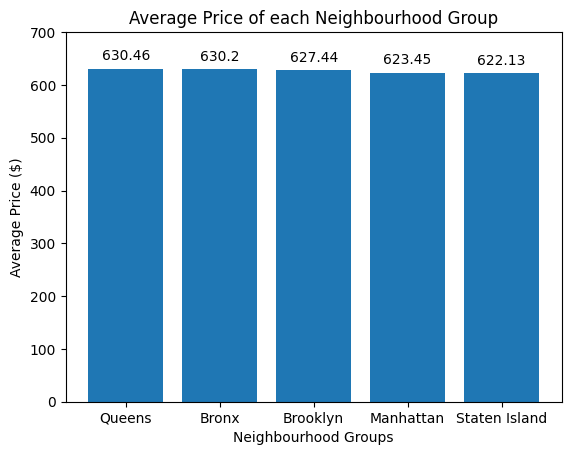

In [89]:
# Neighbourhood Groups having the Highest Average Prices
average_price=df.groupby('neighbourhood group')['price ($)'].mean().sort_values(ascending=False).to_frame()
average_price_bar=plt.bar(average_price.index, average_price.loc[:,"price ($)"])
plt.bar_label(average_price_bar, labels=round(average_price.loc[:,"price ($)"], 2), label_type='edge', padding=4)
plt.ylim([0,700])
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Average Price ($)')
plt.title('Average Price of each Neighbourhood Group')

Text(0.5, 1.0, 'Average Price of Properties in each Construction Year')

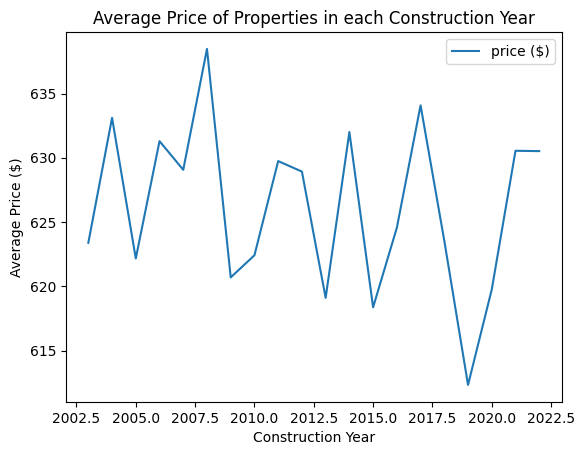

In [90]:
# Relationship Between the Construction Year of Property and Price
df.groupby(df['Construction year'])['price ($)'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price of Properties in each Construction Year')

Text(0.5, 1.0, 'Top 10 Hosts with the most Listings')

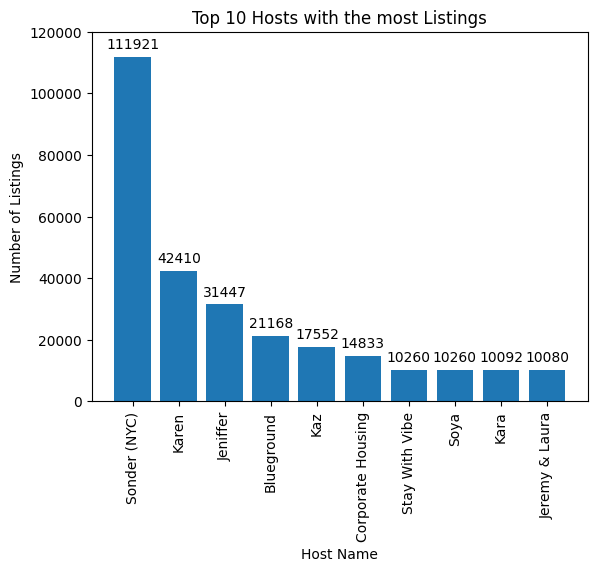

In [91]:
# Top 10 Hosts with most Listings
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"])
plt.bar_label(hosts_bar, label=hosts.loc[:,"calculated host listings count"], label_type='edge', padding=4)
plt.ylim([0,120000])
plt.xlabel('Host Name')
plt.xticks(rotation=90)
plt.ylabel('Number of Listings')
plt.title('Top 10 Hosts with the most Listings')

In [92]:
# Hosts with Verified Identities to recieve Positive Reviews
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


Text(0.5, 1.0, 'Average Review Rate Number for each Host Identity Verified')

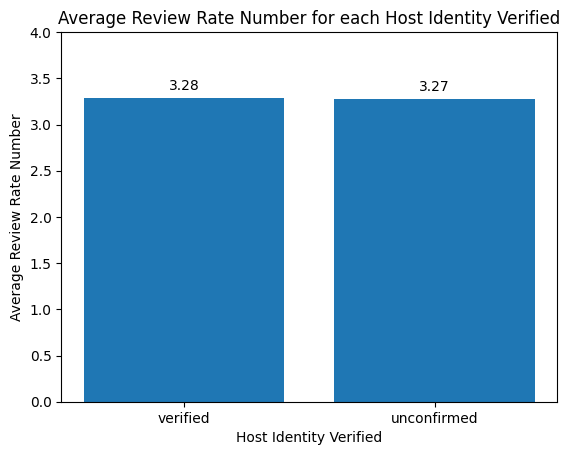

In [93]:
# Average Review Rate Number Plotted on a Bar Chart
review_bar=plt.bar(review.index, review.loc[:,"review rate number"])
plt.bar_label(review_bar, labels=round(review.loc[:,"review rate number"], 2), padding=4)
plt.ylim([0,4])
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate Number for each Host Identity Verified')

Text(0.5, 1.0, 'Review Rate Number for each Host Identity Verified')

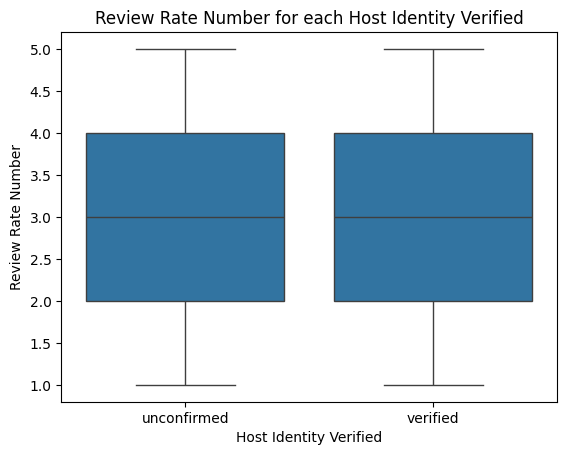

In [94]:
# Review Rate Number Plotted on a Box Chart
base_color=sns.color_palette()[0]
sns.boxplot(data=df, x='host_identity_verified', y='review rate number', color=base_color)
plt.xlabel('Host Identity Verified')
plt.ylabel('Review Rate Number')
plt.title('Review Rate Number for each Host Identity Verified')

In [95]:
# Correlation between Price of a Listing and its Service Fee
print(df['price ($)'].corr(df['service fee ($)']))

0.9999909074778258


Text(0.5, 1.0, 'Correlation of Price of a Listing and its Service Fee')

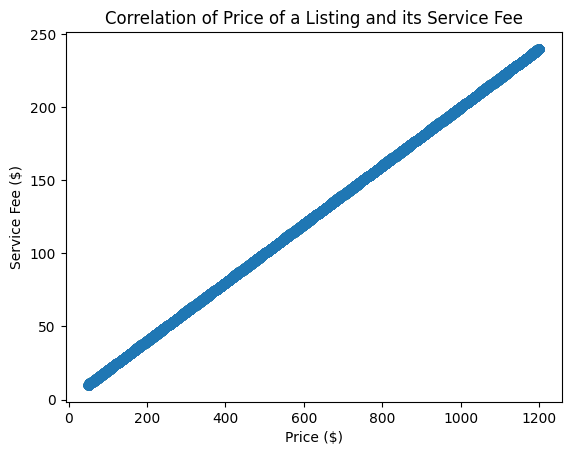

In [96]:
# Regression Plot showing the Correlation of Price of a Listing and its Service Fee
sns.regplot(data=df, x='price ($)', y='service fee ($)', color=base_color)
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('Correlation of Price of a Listing and its Service Fee')

In [97]:
# Average Review Rate Number for Listings and its Variation based on Neighbourhood Group and Room Type
avg_review_rate_number=df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
avg_review_rate_number

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

Text(0.5, 1.0, 'Average Review Rate Number for each Room Type in each Neighbourhood Group')

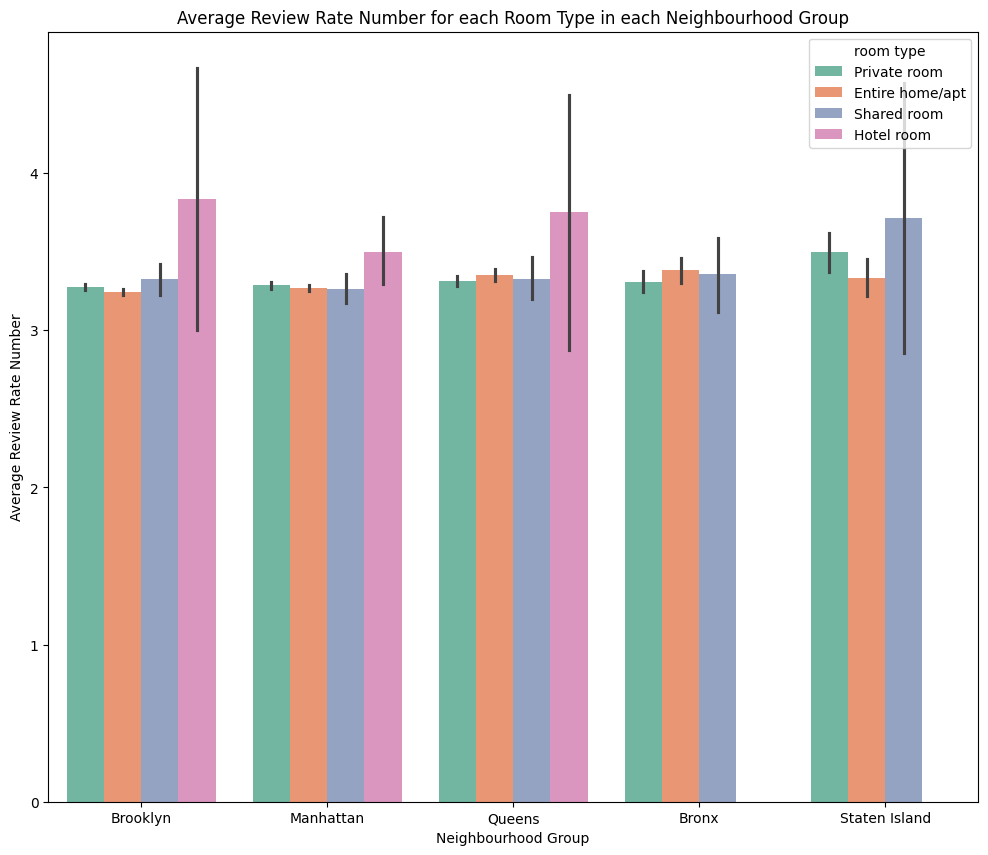

In [98]:
# Average Review Rate Number for each Room Type in each Neighbourhood Group Plotted on a Bar Chart
plt.figure(figsize=(12,10))
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type', palette='Set2')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate Number for each Room Type in each Neighbourhood Group')

Text(0.5, 1.0, 'Correlation of Number of Host Listings and Availability')

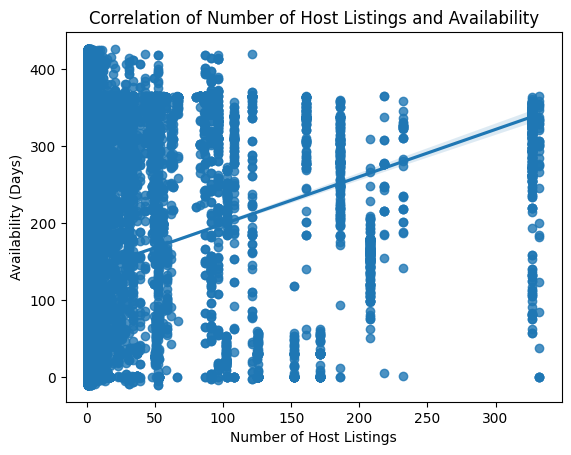

In [99]:
# Regression Plot showing the Correlation of Number of Host Listings and Availability
sns.regplot(data=df, x='calculated host listings count', y='availability 365', color=base_color)
plt.xlabel('Number of Host Listings')
plt.ylabel('Availability (Days)')
plt.title('Correlation of Number of Host Listings and Availability')

In [100]:
# Correlation between Calculated Host Listings Count and Availability (Days)
print(df['calculated host listings count'].corr(df['availability 365']))

0.1359855273675869
